In [171]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score


In [172]:
# 读取数据
df = pd.read_excel(r"F:\codes\00-WORK\work-1\01-myself\01-predict\03-classification\EXCEL\AD.xlsx")
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,Yield,R,CHS,Q,Cata_Code,MCS,Closed_CC,AD,TC,CS
0,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,0.0,100000,108.6,90.8,36.8,24.36,212.6
1,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,0.0,100000,94.1,90.8,36.8,NaN,131.3
2,100010000,31.5,440.000000,NaN,1000.0,18.0,50.676157,1.494662,1.010676,64.000000,...,97.017857,1.10,58.400000,0.0,100100,310.0,88.9,39.0,28.74,NaN
3,100100100,31.5,429.326712,NaN,1000.0,18.0,32.931727,0.975330,0.659782,51.500000,...,97.377587,1.10,63.500000,0.0,100100,220.0,89.9,37.6,28.72,NaN
4,100100100,31.5,418.118624,NaN,1000.0,18.0,30.906059,0.990550,0.617009,50.100000,...,97.428971,1.10,64.600000,0.0,100100,210.0,84.2,30.8,28.59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,100010000,31.0,416.000000,2.000000,1000.0,18.0,73.421439,2.276065,1.101322,0.367107,...,96.859603,1.10,57.662997,48.0,100000,NaN,20.4,37.8,37.01,NaN
289,100010000,31.0,416.000000,2.000000,1000.0,18.0,80.515298,1.328502,1.207729,0.402576,...,98.229830,1.10,55.396967,48.0,100000,NaN,15.9,58.0,38.79,NaN
290,100010000,31.0,416.000000,2.000000,1000.0,18.0,84.104289,0.849453,1.261564,0.420521,...,98.887437,1.10,54.317040,48.0,100000,NaN,19.5,81.3,39.74,NaN
291,100010000,31.0,416.000000,2.000000,1000.0,18.0,85.251492,0.699062,1.278772,0.426257,...,99.089386,1.10,53.980672,48.0,100000,NaN,34.5,97.6,40.45,NaN


In [173]:
df = df.dropna(subset=['AD'])
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,Yield,R,CHS,Q,Cata_Code,MCS,Closed_CC,AD,TC,CS
0,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,0.0,100000,108.6,90.8,36.8,24.36,212.6
1,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,0.0,100000,94.1,90.8,36.8,NaN,131.3
2,100010000,31.5,440.000000,NaN,1000.0,18.0,50.676157,1.494662,1.010676,64.000000,...,97.017857,1.10,58.400000,0.0,100100,310.0,88.9,39.0,28.74,NaN
3,100100100,31.5,429.326712,NaN,1000.0,18.0,32.931727,0.975330,0.659782,51.500000,...,97.377587,1.10,63.500000,0.0,100100,220.0,89.9,37.6,28.72,NaN
4,100100100,31.5,418.118624,NaN,1000.0,18.0,30.906059,0.990550,0.617009,50.100000,...,97.428971,1.10,64.600000,0.0,100100,210.0,84.2,30.8,28.59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,100010000,31.0,416.000000,2.000000,1000.0,18.0,73.421439,2.276065,1.101322,0.367107,...,96.859603,1.10,57.662997,48.0,100000,NaN,20.4,37.8,37.01,NaN
289,100010000,31.0,416.000000,2.000000,1000.0,18.0,80.515298,1.328502,1.207729,0.402576,...,98.229830,1.10,55.396967,48.0,100000,NaN,15.9,58.0,38.79,NaN
290,100010000,31.0,416.000000,2.000000,1000.0,18.0,84.104289,0.849453,1.261564,0.420521,...,98.887437,1.10,54.317040,48.0,100000,NaN,19.5,81.3,39.74,NaN
291,100010000,31.0,416.000000,2.000000,1000.0,18.0,85.251492,0.699062,1.278772,0.426257,...,99.089386,1.10,53.980672,48.0,100000,NaN,34.5,97.6,40.45,NaN


In [174]:
# #删除不需要的列
# df.drop(columns=['S_CS', 'S_TC', 'ΔS_CS', 'ΔS_TC'], inplace=True)
# df

In [175]:
import pandas as pd

# 重命名列名，方便处理
df = df.rename(columns={'AD': 'AD', 
                        'CS': 'CS', 
                        'TC': 'TC'})

# 计算 AD 的中位数
AD_50 = df['AD'].quantile(0.5)
print(f"AD 中位数 (50%): {AD_50}")
# 分组：高密度和低密度
high_density = df[df['AD'] > AD_50]
low_density = df[df['AD'] <= AD_50]

# 定义函数：返回各组的统计值，包括 AD, CS, TC 的均值和 AD 的最大/最小
def describe_group(group, name):
    count = len(group)
    ratio = count / len(df)
    ad_mean = group['AD'].mean()
    ad_max = group['AD'].max()
    ad_min = group['AD'].min()
    cs_mean = group['CS'].mean()
    tc_mean = group['TC'].mean()
    cs_max = group['CS'].max()
    tc_max = group['TC'].max()
    cs_min = group['CS'].min()
    tc_min = group['TC'].min()

    return {
        'group': name,
        'count': count,
        'ratio': ratio,
        'AD_mean': ad_mean,
        'AD_max': ad_max,
        'AD_min': ad_min,
        'CS_mean': cs_mean,
        'CS_max': cs_max,
        'CS_min': cs_min,
        'TC_mean': tc_mean,
        'TC_max': tc_max,
        'TC_min': tc_min
    }

# 汇总结果
summary = pd.DataFrame([
    describe_group(high_density, 'High Density'),
    describe_group(low_density, 'Low Density')
])

# 保存并输出
summary.to_csv('density_summary.csv', index=False)
summary


AD 中位数 (50%): 43.4


,group,count,ratio,AD_mean,AD_max,AD_min,CS_mean,CS_max,CS_min,TC_mean,TC_max,TC_min
0,High Density,146,0.498294,69.821164,148.0,43.5,439.729851,2890.0,69.6,31.795169,53.1,19.42
1,Low Density,147,0.501706,35.992109,43.4,18.7,183.425610,357.0,49.1,28.386471,51.0,15.10


In [176]:
# 添加 classification 列：高密度为 1，其余为 0
df['classification'] = df['AD'].apply(lambda x: 1 if x > AD_50 else 0)
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,Q,Cata_Code,MCS,Closed_CC,AD,TC,CS,classification
0,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,0.0,100000,108.6,90.8,36.8,24.36,212.6,0
1,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,0.0,100000,94.1,90.8,36.8,NaN,131.3,0
2,100010000,31.5,440.000000,NaN,1000.0,18.0,50.676157,1.494662,1.010676,64.000000,...,1.10,58.400000,0.0,100100,310.0,88.9,39.0,28.74,NaN,0
3,100100100,31.5,429.326712,NaN,1000.0,18.0,32.931727,0.975330,0.659782,51.500000,...,1.10,63.500000,0.0,100100,220.0,89.9,37.6,28.72,NaN,0
4,100100100,31.5,418.118624,NaN,1000.0,18.0,30.906059,0.990550,0.617009,50.100000,...,1.10,64.600000,0.0,100100,210.0,84.2,30.8,28.59,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,100010000,31.0,416.000000,2.000000,1000.0,18.0,73.421439,2.276065,1.101322,0.367107,...,1.10,57.662997,48.0,100000,NaN,20.4,37.8,37.01,NaN,0
289,100010000,31.0,416.000000,2.000000,1000.0,18.0,80.515298,1.328502,1.207729,0.402576,...,1.10,55.396967,48.0,100000,NaN,15.9,58.0,38.79,NaN,1
290,100010000,31.0,416.000000,2.000000,1000.0,18.0,84.104289,0.849453,1.261564,0.420521,...,1.10,54.317040,48.0,100000,NaN,19.5,81.3,39.74,NaN,1
291,100010000,31.0,416.000000,2.000000,1000.0,18.0,85.251492,0.699062,1.278772,0.426257,...,1.10,53.980672,48.0,100000,NaN,34.5,97.6,40.45,NaN,1


In [177]:
# 删除原始列
df.drop(columns=["AD", "TC", "CS"], inplace=True)

# df.to_excel("processed_classification.xlsx", index=False)
# 重置索引
df.reset_index(drop=True, inplace=True)
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,C_BA_MR,M_loss,Yield,R,CHS,Q,Cata_Code,MCS,Closed_CC,classification
0,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,0.180000,5.351351,96.884711,1.83,59.700000,0.0,100000,108.6,90.8,0
1,110100000,31.0,367.991736,4.464132,1000.0,18.0,67.567568,2.182432,1.013514,1.013514,0.180000,5.351351,96.884711,1.83,59.700000,0.0,100000,94.1,90.8,0
2,100010000,31.5,440.000000,NaN,1000.0,18.0,50.676157,1.494662,1.010676,64.000000,0.167000,5.229893,97.017857,1.10,58.400000,0.0,100100,310.0,88.9,0
3,100100100,31.5,429.326712,NaN,1000.0,18.0,32.931727,0.975330,0.659782,51.500000,0.167000,4.215720,97.377587,1.10,63.500000,0.0,100100,220.0,89.9,0
4,100100100,31.5,418.118624,NaN,1000.0,18.0,30.906059,0.990550,0.617009,50.100000,0.167000,4.084491,97.428971,1.10,64.600000,0.0,100100,210.0,84.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,100010000,31.0,416.000000,2.000000,1000.0,18.0,73.421439,2.276065,1.101322,0.367107,0.172222,5.563713,96.859603,1.10,57.662997,48.0,100000,NaN,20.4,0
289,100010000,31.0,416.000000,2.000000,1000.0,18.0,80.515298,1.328502,1.207729,0.402576,0.091667,3.247450,98.229830,1.10,55.396967,48.0,100000,NaN,15.9,1
290,100010000,31.0,416.000000,2.000000,1000.0,18.0,84.104289,0.849453,1.261564,0.420521,0.056111,2.076441,98.887437,1.10,54.317040,48.0,100000,NaN,19.5,1
291,100010000,31.0,416.000000,2.000000,1000.0,18.0,85.251492,0.699062,1.278772,0.426257,0.045556,1.708819,99.089386,1.10,53.980672,48.0,100000,NaN,34.5,1


In [178]:
missing_rate = df.isnull().sum() / len(df)
# print(missing_rate)
# 找出缺失值比例大于 0.5 的列
cols_to_drop = missing_rate[missing_rate > 0.5].index
#打印缺失值比例大于 0.5 的列的缺失率
print("缺失值比例大于 0.5 的列：")
print(missing_rate[missing_rate > 0.5])

缺失值比例大于 0.5 的列：
Closed_CC    0.552901
dtype: float64


In [179]:
# 删除缺失值比例大于 0.5 的列
df.drop(columns=cols_to_drop, inplace=True)
df.shape

(293, 19)

In [180]:
import numpy as np
import pandas as pd
from matimpute import MatImputer

mat_impute = MatImputer()
df = mat_impute.transform(df)


In [181]:
df.to_excel("AD.xlsx", index=False)

In [182]:
X = df.drop(columns=['classification'])
y = df['classification']

In [183]:
# from catboost import CatBoostClassifier
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import KFold
# import matplotlib.pyplot as plt

# # CatBoost 分类模型
# clf = CatBoostClassifier(random_state=42, iterations=500, verbose=0)

# # 交叉验证
# cv = KFold(n_splits=3, random_state=42, shuffle=True)

# # 递归特征消除与交叉验证
# rfecv = RFECV(estimator=clf, step=1, cv=cv, scoring='accuracy')  # Use accuracy as scoring metric for classification
# rfecv.fit(X, y.values.ravel())  # Ensure y is categorical

# print("Optimal number of features: %d" % rfecv.n_features_)

# # 绘制特征数量与交叉验证得分的关系
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score")
# plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
# plt.show()

In [184]:
# # 获取被选为最优的特征的名称
# optimal_features = X.columns[rfecv.support_]
# print("Optimal features:", optimal_features)

In [185]:
# X = X[optimal_features]
# X

In [186]:
# 划分数据集（假设 X 和 y 已定义）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

classification
1    0.504274
0    0.495726
Name: proportion, dtype: float64
classification
0    0.525424
1    0.474576
Name: proportion, dtype: float64


In [188]:
# # 选择分类模型
# models = [
#     CatBoostClassifier(verbose=0), RandomForestClassifier(), ExtraTreesClassifier(),
#     LogisticRegression(max_iter=1000), RidgeClassifier(), 
#     GradientBoostingClassifier(), AdaBoostClassifier(), XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
#     SVC(), DecisionTreeClassifier(), KNeighborsClassifier()
# ]

# model_scores = []

# # 计算每个模型的五折交叉验证准确率
# for model in models:
#     print("Model: ", model.__class__.__name__)
    
#     # 计算五折交叉验证准确率
#     cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
#     mean_score = np.mean(cv_scores)
    
#     print("Cross-validated Accuracy: ", mean_score)
    
#     model_scores.append((model.__class__.__name__, mean_score))

# # 排序输出前五模型
# model_scores_sorted = sorted(model_scores, key=lambda x: x[1], reverse=True)

# print("\nTop 5 models based on cross-validation accuracy:")
# for i, (name, score) in enumerate(model_scores_sorted[:5]):
#     print(f"{i+1}. {name} - Accuracy: {score:.4f}")

In [189]:
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import make_scorer, f1_score

# # 分层 K 折交叉验证，保持标签分布一致
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# # 目标函数：优化 F1 分数
# def objective(trial):
#     param_grid = {
#         'iterations': trial.suggest_int('iterations', 200, 500, step=100),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 2, 10),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#     }

#     model = CatBoostClassifier(
#         **param_grid,
#         random_state=42,
#         verbose=0
#     )

#     # 计算交叉验证 F1 分数
#     score = cross_val_score(model, X_train, y_train,
#                             cv=cv, scoring=make_scorer(f1_score), n_jobs=-1)
#     return score.mean()

# # 开始调参
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # 输出最佳结果
# print("✅ 最佳超参数组合：")
# print(study.best_params)
# print(f"最佳平均 F1 分数：{study.best_value:.4f}")


In [190]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# 创建 Stratified K-fold（保持类比例）
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# F1-score 评价函数（适合分类任务）
f1 = make_scorer(f1_score, average='binary')  # 若为多分类请改为 'macro' 或 'weighted'

# 目标函数
def objective(trial):
    param_grid = {
        'iterations': trial.suggest_int('iterations', 500, 1000, step=100),
        'depth': trial.suggest_int('depth', 3, 4),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.02, step=0.001),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),
        'border_count': trial.suggest_int('border_count', 64, 128)
    }

    model = CatBoostClassifier(
        **param_grid,
        random_state=42,
        verbose=0
    )

    scores = cross_val_score(
        model, X_train, y_train,
        cv=cv, scoring=f1, n_jobs=-1
    )

    return np.mean(scores)

# 创建 study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 输出结果
print("✅ 最佳超参数组合：")
print(study.best_params)
print(f"最佳平均 F1 分数：{study.best_value:.4f}")


[I 2025-07-27 21:19:59,306] A new study created in memory with name: no-name-4e350261-6e5b-403e-a636-66ae8ff8f027
[I 2025-07-27 21:19:59,943] Trial 0 finished with value: 0.8842965046621867 and parameters: {'iterations': 500, 'depth': 4, 'learning_rate': 0.015, 'l2_leaf_reg': 3, 'border_count': 113}. Best is trial 0 with value: 0.8842965046621867.
[I 2025-07-27 21:20:00,585] Trial 1 finished with value: 0.872231955102634 and parameters: {'iterations': 600, 'depth': 3, 'learning_rate': 0.013000000000000001, 'l2_leaf_reg': 4, 'border_count': 95}. Best is trial 0 with value: 0.8842965046621867.
[I 2025-07-27 21:20:01,309] Trial 2 finished with value: 0.8762349844221188 and parameters: {'iterations': 700, 'depth': 3, 'learning_rate': 0.017, 'l2_leaf_reg': 4, 'border_count': 103}. Best is trial 0 with value: 0.8842965046621867.
[I 2025-07-27 21:20:02,205] Trial 3 finished with value: 0.8808520676299881 and parameters: {'iterations': 800, 'depth': 4, 'learning_rate': 0.013000000000000001, 'l

✅ 最佳超参数组合：
{'iterations': 600, 'depth': 4, 'learning_rate': 0.01, 'l2_leaf_reg': 4, 'border_count': 120}
最佳平均 F1 分数：0.9031


In [191]:
Best_hyperparameters = study.best_params
Best_hyperparameters

{'iterations': 600,
 'depth': 4,
 'learning_rate': 0.01,
 'l2_leaf_reg': 4,
 'border_count': 120}

In [192]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # 使用最优超参数训练分类模型
# best_model = CatBoostClassifier(**Best_hyperparameters, random_state=42, verbose=0)

# # 在训练集上训练模型
# best_model.fit(X_train, y_train)

# # 在测试集和训练集上进行预测
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # 计算分类模型的指标
# accuracy_train = accuracy_score(y_train, y_pred_train)
# accuracy_test = accuracy_score(y_test, y_pred_test)

# precision_train = precision_score(y_train, y_pred_train, average='weighted')
# precision_test = precision_score(y_test, y_pred_test, average='weighted')

# recall_train = recall_score(y_train, y_pred_train, average='weighted')
# recall_test = recall_score(y_test, y_pred_test, average='weighted')

# f1_train = f1_score(y_train, y_pred_train, average='weighted')
# f1_test = f1_score(y_test, y_pred_test, average='weighted')

# # 输出结果
# print(f"accuracy_train: {accuracy_train:.4f}")
# print(f"accuracy_test: {accuracy_test:.4f}")

# print(f"precision_train: {precision_train:.4f}")
# print(f"precision_test: {precision_test:.4f}")

# print(f"recall_train: {recall_train:.4f}")
# print(f"recall_test: {recall_test:.4f}")

# print(f"f1_train: {f1_train:.4f}")
# print(f"f1_test: {f1_test:.4f}")


In [193]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 使用最优超参数训练分类模型
best_model = CatBoostClassifier(**Best_hyperparameters, random_state=42, verbose=0)

# 在训练集上训练模型
best_model.fit(X_train, y_train)

# 在测试集和训练集上进行预测
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 计算分类模型的指标
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# 输出结果
print(f"accuracy_train: {accuracy_train:.4f}")
print(f"accuracy_test: {accuracy_test:.4f}")

print(f"precision_train: {precision_train:.4f}")
print(f"precision_test: {precision_test:.4f}")

print(f"recall_train: {recall_train:.4f}")
print(f"recall_test: {recall_test:.4f}")

print(f"f1_train: {f1_train:.4f}")
print(f"f1_test: {f1_test:.4f}")


accuracy_train: 0.9915
accuracy_test: 0.9492
precision_train: 0.9916
precision_test: 0.9498
recall_train: 0.9915
recall_test: 0.9492
f1_train: 0.9915
f1_test: 0.9492


In [194]:
import json

# 假设 study 是你调参后的 Optuna study 对象
with open('AD_best_params.json', 'w') as f:
    json.dump(study.best_params, f)

In [195]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 定义评估函数
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# 初始化容器
train_accuracy_scores, val_accuracy_scores = [], []
train_precision_scores, val_precision_scores = [], []
train_recall_scores, val_recall_scores = [], []
train_f1_scores, val_f1_scores = [], []
results, tprs, aucs = [], [], []
mean_fpr = np.linspace(0, 1, 100)

# 用于收集全部验证集预测
all_y_val = []
all_y_pred_val = []

cv = KFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X), start=1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # 训练模型
    best_model.fit(X_train, y_train)

    # 预测
    y_pred_train = best_model.predict(X_train)
    y_pred_val = best_model.predict(X_val)

    # 收集验证集预测
    all_y_val.extend(y_val)
    all_y_pred_val.extend(y_pred_val)

    # 评估
    accuracy_train, precision_train, recall_train, f1_train = evaluate_model(y_train, y_pred_train)
    accuracy_val, precision_val, recall_val, f1_val = evaluate_model(y_val, y_pred_val)

    train_accuracy_scores.append(accuracy_train)
    val_accuracy_scores.append(accuracy_val)
    train_precision_scores.append(precision_train)
    val_precision_scores.append(precision_val)
    train_recall_scores.append(recall_train)
    val_recall_scores.append(recall_val)
    train_f1_scores.append(f1_train)
    val_f1_scores.append(f1_val)

    # ROC 曲线
    y_prob = best_model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

    results.append({'fold': fold, 'fpr': fpr, 'tpr': tpr, 'auc': roc_auc})

# 汇总结果
df_results = pd.DataFrame({
    'Fold': range(1, 4),
    'accuracy_train': train_accuracy_scores,
    'accuracy_val': val_accuracy_scores,
    'precision_train': train_precision_scores,
    'precision_val': val_precision_scores,
    'recall_train': train_recall_scores,
    'recall_val': val_recall_scores,
    'f1_train': train_f1_scores,
    'f1_val': val_f1_scores
})

In [196]:
df_results

,Fold,accuracy_train,accuracy_val,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val
0,1,0.994872,0.897959,0.994924,0.898539,0.994872,0.897959,0.994872,0.897874
1,2,0.984615,0.938776,0.984661,0.938776,0.984615,0.938776,0.984612,0.938776
2,3,0.989796,0.865979,0.989796,0.866394,0.989796,0.865979,0.989796,0.866094


In [197]:
# 获取需要计算的列（去除'Fold'列）
cols = df_results.drop('Fold', axis=1).columns

# 计算每一列的平均值和标准差
mean = df_results[cols].mean()
std = df_results[cols].std()

# 生成中间加减的形式，并保留两位小数
result = mean.round(2).astype(str) + ' ± ' + std.round(2).astype(str)

# 打印结果
print(result)


accuracy_train     0.99 ± 0.01
accuracy_val        0.9 ± 0.04
precision_train    0.99 ± 0.01
precision_val       0.9 ± 0.04
recall_train       0.99 ± 0.01
recall_val          0.9 ± 0.04
f1_train           0.99 ± 0.01
f1_val              0.9 ± 0.04
dtype: object


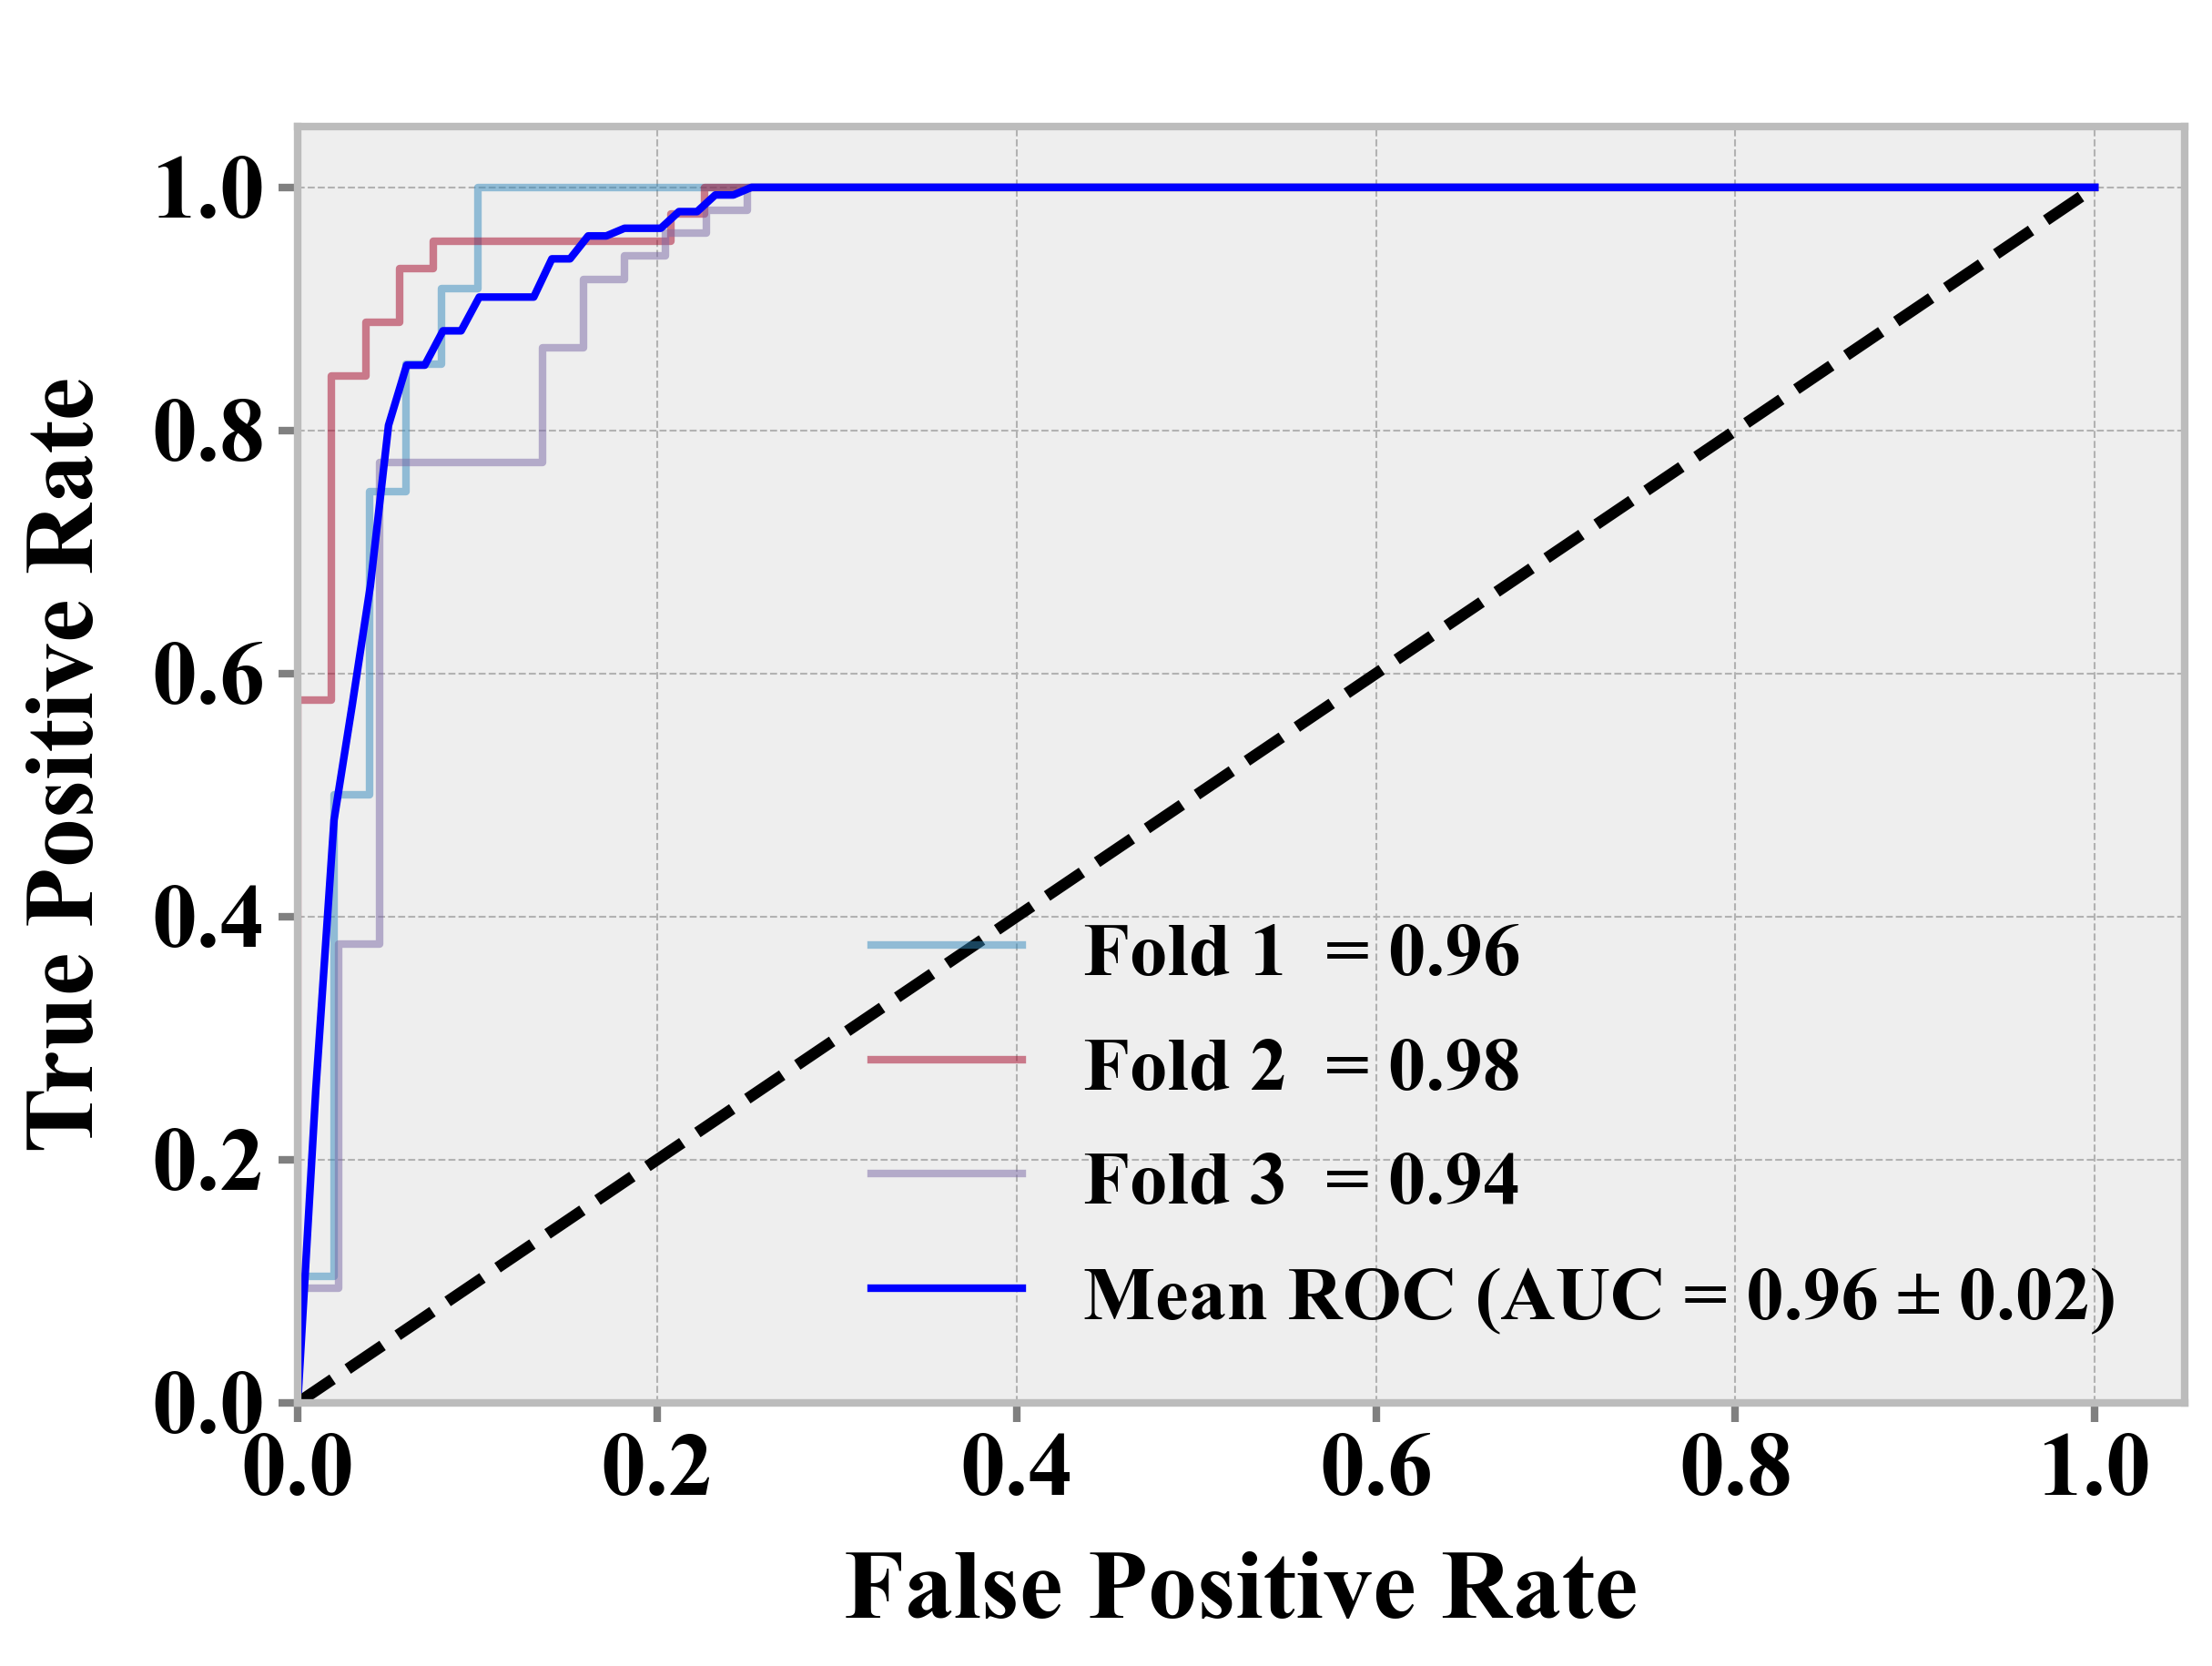

In [198]:
plt.figure(figsize=(8.5, 6.5), dpi=300)
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
 
# 画每一折的ROC
for r in results:
    plt.plot(r['fpr'], r['tpr'], lw=2, alpha=0.5, label=f"Fold {r['fold']}  = {r['auc']:.2f}")
 
# # 画每一折的ROC
# for r in results:
#     plt.plot(r['fpr'], r['tpr'], lw=2, alpha=0.5)

# 平均ROC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='blue',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
         lw=2, alpha=1)

plt.plot([0, 1], [0, 1], 'k--', lw=3)

# 图表修饰
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate', fontsize=26, fontweight='bold', labelpad=10, color='black')
plt.ylabel('True Positive Rate', fontsize=26, fontweight='bold', labelpad=10, color='black')
plt.xticks(fontsize=24, fontweight='bold', color='black')
plt.yticks(fontsize=24, fontweight='bold', color='black')
plt.tick_params(axis='both', which='both', direction='out', length=5, width=2, color='gray', bottom=True, top=False, left=True, right=False)

plt.title(' ')
plt.legend(loc='lower right',  frameon=False, handlelength=2, handleheight=1, prop={'size': 20, 'weight': 'bold', 'family': 'Times New Roman'})

plt.grid(True)
plt.tight_layout()
plt.show()


In [199]:
import pandas as pd

def save_roc_data_to_excel(results_all, quadrants, filename='ROC_Data_All.xlsx'):
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        for q in quadrants:
            res = results_all[q]

            # 每折 ROC 数据
            fold_data = []
            for fm in res['fold_metrics']:
                fold = fm['fold']
                for fpr, tpr in zip(fm['fpr'], fm['tpr']):
                    fold_data.append({'Fold': fold, 'FPR': fpr, 'TPR': tpr})
            df_fold = pd.DataFrame(fold_data)
            df_fold.to_excel(writer, sheet_name=f'ROC_Folds_{q}', index=False)

            # 平均 ROC 曲线
            df_mean = pd.DataFrame({
                'FPR': res['mean_fpr'],
                'TPR': res['mean_tpr'],
            })
            df_mean['Mean AUC'] = res['mean_auc']
            df_mean.to_excel(writer, sheet_name=f'ROC_Mean_{q}', index=False)

            # 汇总指标表（含Acc/Prec/Rec/F1/AUC）
            df_metrics = metrics_df_with_mean(res['fold_metrics'])
            df_metrics.to_excel(writer, sheet_name=f'Metrics_{q}', index=False)

    print(f"✅ ROC 曲线和评估指标已保存为 {filename}")

    

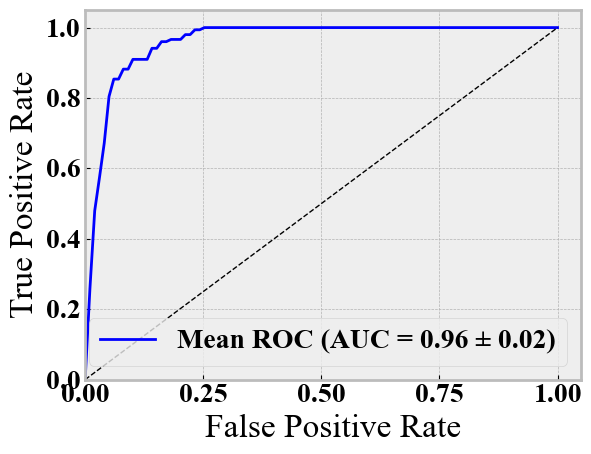

In [200]:
# 计算平均 ROC 曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
# 绘制平均 ROC 曲线
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
         lw=2, alpha=1)

# 对角线
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# 美化图表
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Mean ROC Curve (5-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

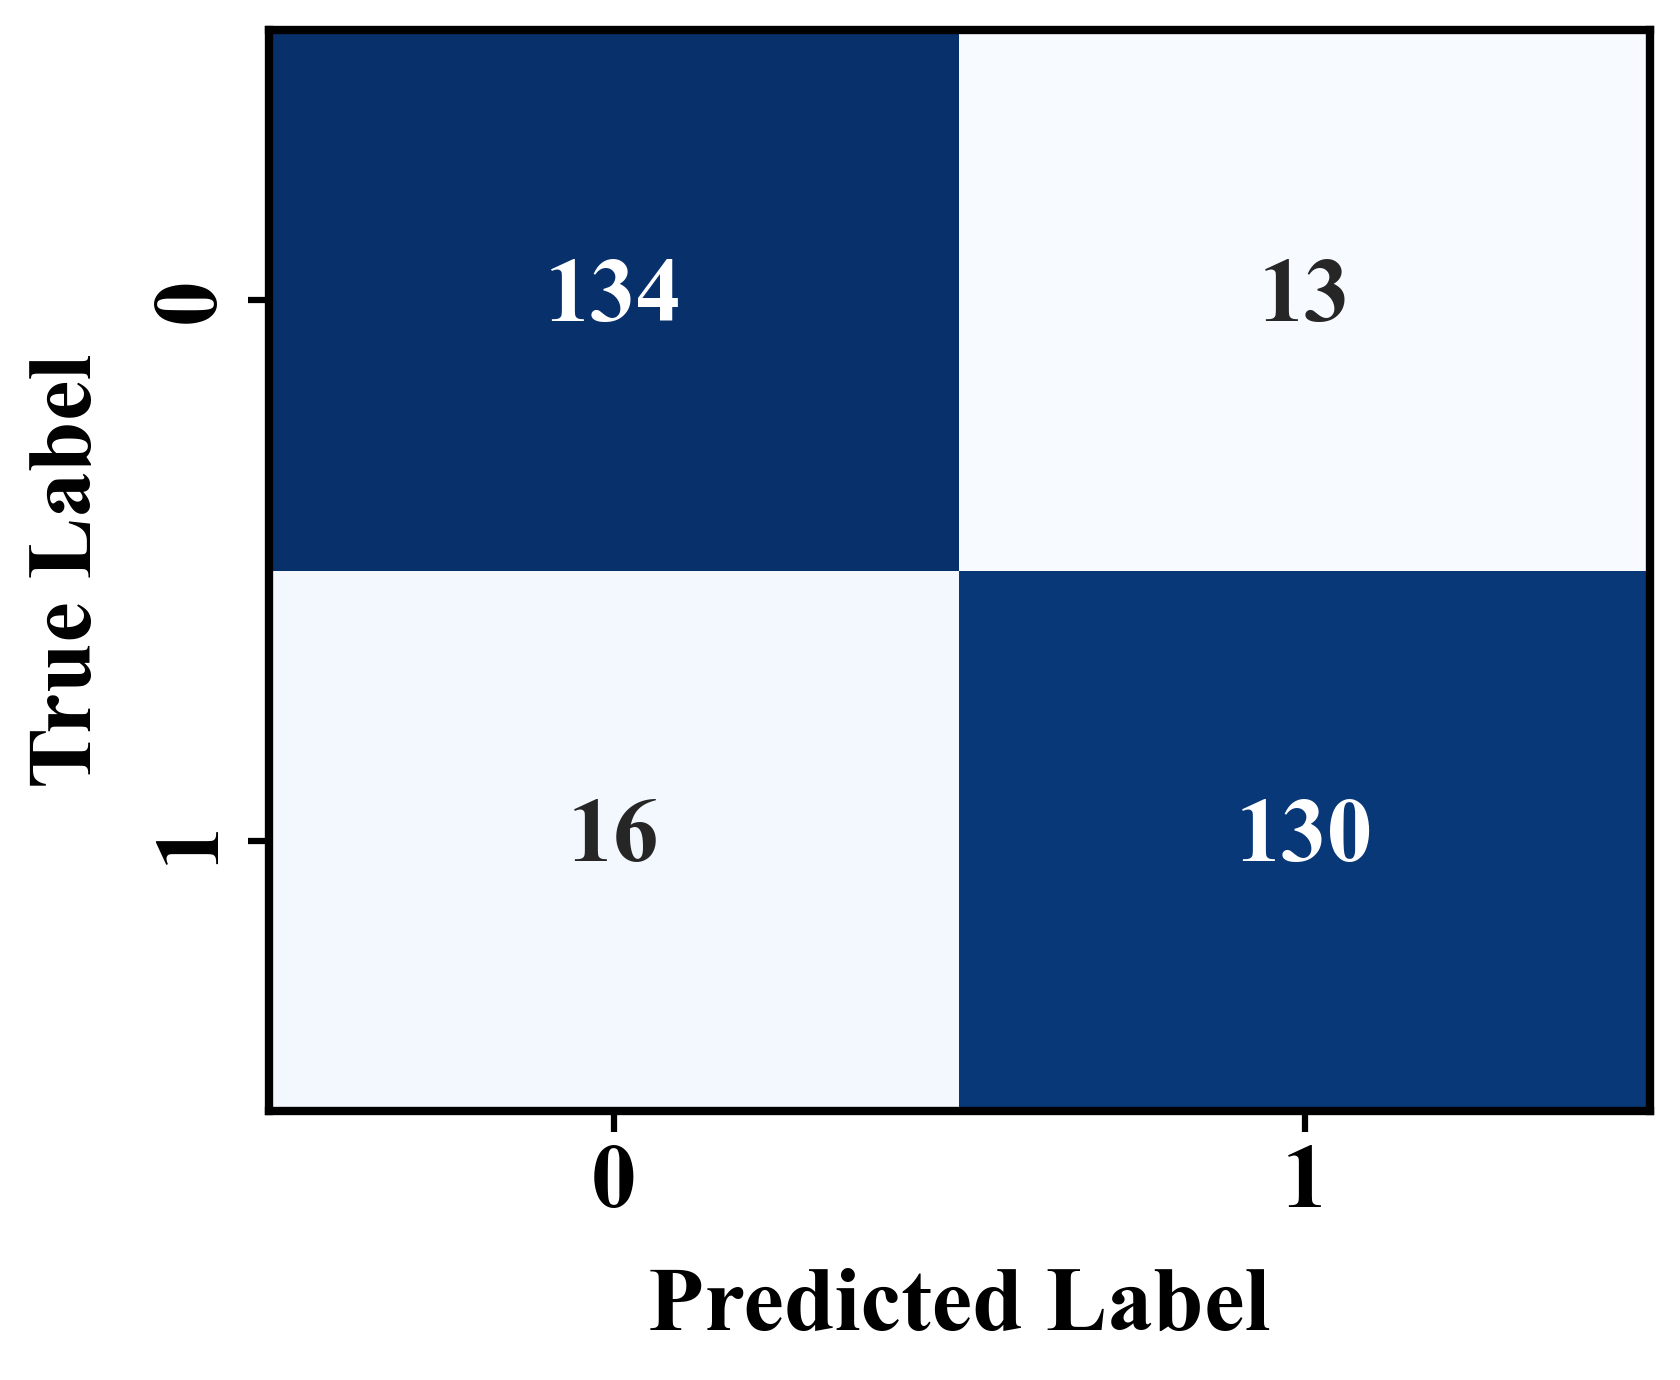

In [201]:
# 计算整体混淆矩阵
cm = confusion_matrix(all_y_val, all_y_pred_val)

# 获取分类标签
class_labels = np.unique(all_y_val)

# 创建图形
plt.figure(figsize=(6, 5), dpi=300)

# 使用 seaborn 绘制热力图
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=class_labels, yticklabels=class_labels,
                 cbar=False, annot_kws={"size": 22, "weight": "bold", "fontname": "Times New Roman"})

# 设置标签字体
plt.xlabel("Predicted Label", fontsize=22, fontweight='bold', fontname='Times New Roman', labelpad=10)
plt.ylabel("True Label", fontsize=22, fontweight='bold', fontname='Times New Roman', labelpad=10)

# 设置坐标轴刻度字体
plt.xticks(fontsize=22, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=22, fontweight='bold', fontname='Times New Roman')
# 设置坐标轴刻刻度向外
ax.tick_params(axis='x', direction='out', length=5, width=1.5, colors='black')
ax.tick_params(axis='y', direction='out', length=5, width=1.5, colors='black')
# 设置边框线可见
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_color('black')

#去掉网格
plt.grid(False)

# 布局优化 + 显示
plt.tight_layout()
plt.show()


In [202]:
import shap
# 创建一个SHAP解释器
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X, check_additivity=False)
shap_values

array([[-0.30286196, -0.05251384, -0.75773727, ..., -0.63508299,
         0.04091614,  0.43497509],
       [-0.30321857, -0.05073229, -0.75773727, ..., -0.63557624,
         0.04091614,  0.48409603],
       [ 0.20357147, -0.07931031,  0.69561126, ..., -0.79075791,
        -0.18459444, -0.41309952],
       ...,
       [ 0.30674045,  0.01596099, -0.15801766, ...,  0.45733586,
         0.08904305,  0.47586126],
       [ 0.30805633,  0.01859641, -0.16020412, ...,  0.45912738,
         0.08453441,  0.51823003],
       [ 0.31201276,  0.01859641, -0.16431523, ...,  0.45912738,
         0.08422272,  0.54560401]], shape=(293, 18))

In [203]:
shap_values.shape

(293, 18)

In [204]:
import shap
import os
import matplotlib.pyplot as plt

# 设置字体和样式
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20
plt.style.use('bmh')

# 创建主图
fig, ax1 = plt.subplots(figsize=(10, 8), dpi=1200)

shap.summary_plot(shap_values, X, feature_names=X.columns,
    plot_type="dot", show=False, color_bar=False, max_display=24)

plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 调整位置为主图 ax1
ax1 = plt.gca()

# 顶部条形图（bar plot）
ax2 = ax1.twiny()
shap.summary_plot(
    shap_values, X, feature_names=X.columns,
    plot_type="bar", show=False, max_display=24
)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  # 确保对齐

# 添加灰色参考线
ax2.axhline(y=24, color='gray', linestyle='-', linewidth=2)
# 设置透明度
for bar in ax2.patches:
    bar.set_alpha(0.2)
# 坐标轴标签设置,新罗马字体
ax1.set_xlabel('Shapley Value Contribution', fontsize=20, labelpad=10, weight='bold', fontname='Times New Roman')
ax1.set_ylabel('Features', fontsize=20, labelpad=10, weight='bold', fontname='Times New Roman')

ax2.set_xlabel('Mean (|Shapley Value|)', fontsize=20, labelpad=10, weight='bold', fontname='Times New Roman')
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()

# 设置三个坐标轴的刻度字体大小和粗细
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')

for label in ax2.get_xticklabels():
    label.set_fontsize(18)
    label.set_fontweight('bold')
    label.set_fontname('Times New Roman')

# 调整排版，保存并展示
plt.tight_layout()
plt.show()